In [1]:
# we will start with importing different libraries

# Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# Standardization
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

     
# Feature selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import boxcox

# Load the data
data = pd.read_csv('path_to_your_data.csv')

# Understanding the data
print(data.head())
print(data.info())
print(data.describe())

# Handling missing values
# Identify missing values
missing_values = data.isnull().sum()
print(missing_values)

# Encoding categorical variables
# Label encoding for ordinal categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Fill missing values for numeric columns with mean
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for categorical columns with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    most_frequent = data[col].mode()[0]
    data[col].fillna(most_frequent, inplace=True)

# Handling duplicates
data.drop_duplicates(inplace=True)

# One-hot encoding for nominal categorical variables
# data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Outlier Detection and Treatment
# Applying Box-Cox transformation to handle skewness (only for positive values)
for col in numeric_cols:
    if (data[col] > 0).all():
        data[col], _ = boxcox(data[col] + 1)  # Adding 1 to avoid zero values

# Splitting the Data
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed.")


In [2]:
exercise=pd.read_csv(r"C:\Users\ARPITA\OneDrive\Documents\Calories_burn_pred\exercise.csv")
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4
14996,17212577,female,27,165,65,6,85,39.2
14997,17271188,female,43,159,58,16,90,40.1
14998,18643037,male,78,193,97,2,84,38.3


In [3]:
calories=pd.read_csv(r"C:\Users\ARPITA\OneDrive\Documents\Calories_burn_pred\calories (1).csv")
calories

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35
...,...,...
14995,15644082,45
14996,17212577,23
14997,17271188,75
14998,18643037,11


In [4]:
data = pd.concat([exercise,calories.Calories],axis=1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11


## DATA OVERVIEW

In [5]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [6]:
data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193,86,11,92,40.4,45
14996,17212577,female,27,165,65,6,85,39.2,23
14997,17271188,female,43,159,58,16,90,40.1,75
14998,18643037,male,78,193,97,2,84,38.3,11
14999,11751526,male,63,173,79,18,92,40.5,98


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


## INDEPENDENT AND DEPENDENT FEATURES:

In [8]:
# Independent features
x = data[['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]

# Dependent feature
y= data[['Calories']]

## LABELING OF DATA

In [10]:
# Observation :As the gender feature contains categorical data,
# Perform label encoding

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Gender' column
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Now 'male' is encoded as 0 and 'female' is encoded as 1


In [11]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190,94,29,105,40.8,231
1,14861698,0,20,166,60,14,94,40.3,66
2,11179863,1,69,179,79,5,88,38.7,26
3,16180408,0,34,179,71,13,100,40.5,71
4,17771927,0,27,154,58,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193,86,11,92,40.4,45
14996,17212577,0,27,165,65,6,85,39.2,23
14997,17271188,0,43,159,58,16,90,40.1,75
14998,18643037,1,78,193,97,2,84,38.3,11


## STATISTICAL FEATURES OF DATA

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Gender,15000.0,4.964667e-01,5.000042e-01,0.0,0.00,0.0,1.00,1.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


## KNOWING YOUR DATASET

## Checking null values

In [13]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Checking duplicates count:

In [14]:
data.duplicated().sum()

0

## UNDERSTANDING THE VARIABLES

In [15]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

## EDA

In [16]:
# separating the dataset into dependent & independent variable.
     
X=data[['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp',]]         # Independent variables.
Y=data['Calories']                       # Dependent variables.

In [17]:
X.shape

(15000, 8)

In [18]:
Y.shape

(15000,)

## DATA DISTRIBUTION

### Checking Skewness of the dataset

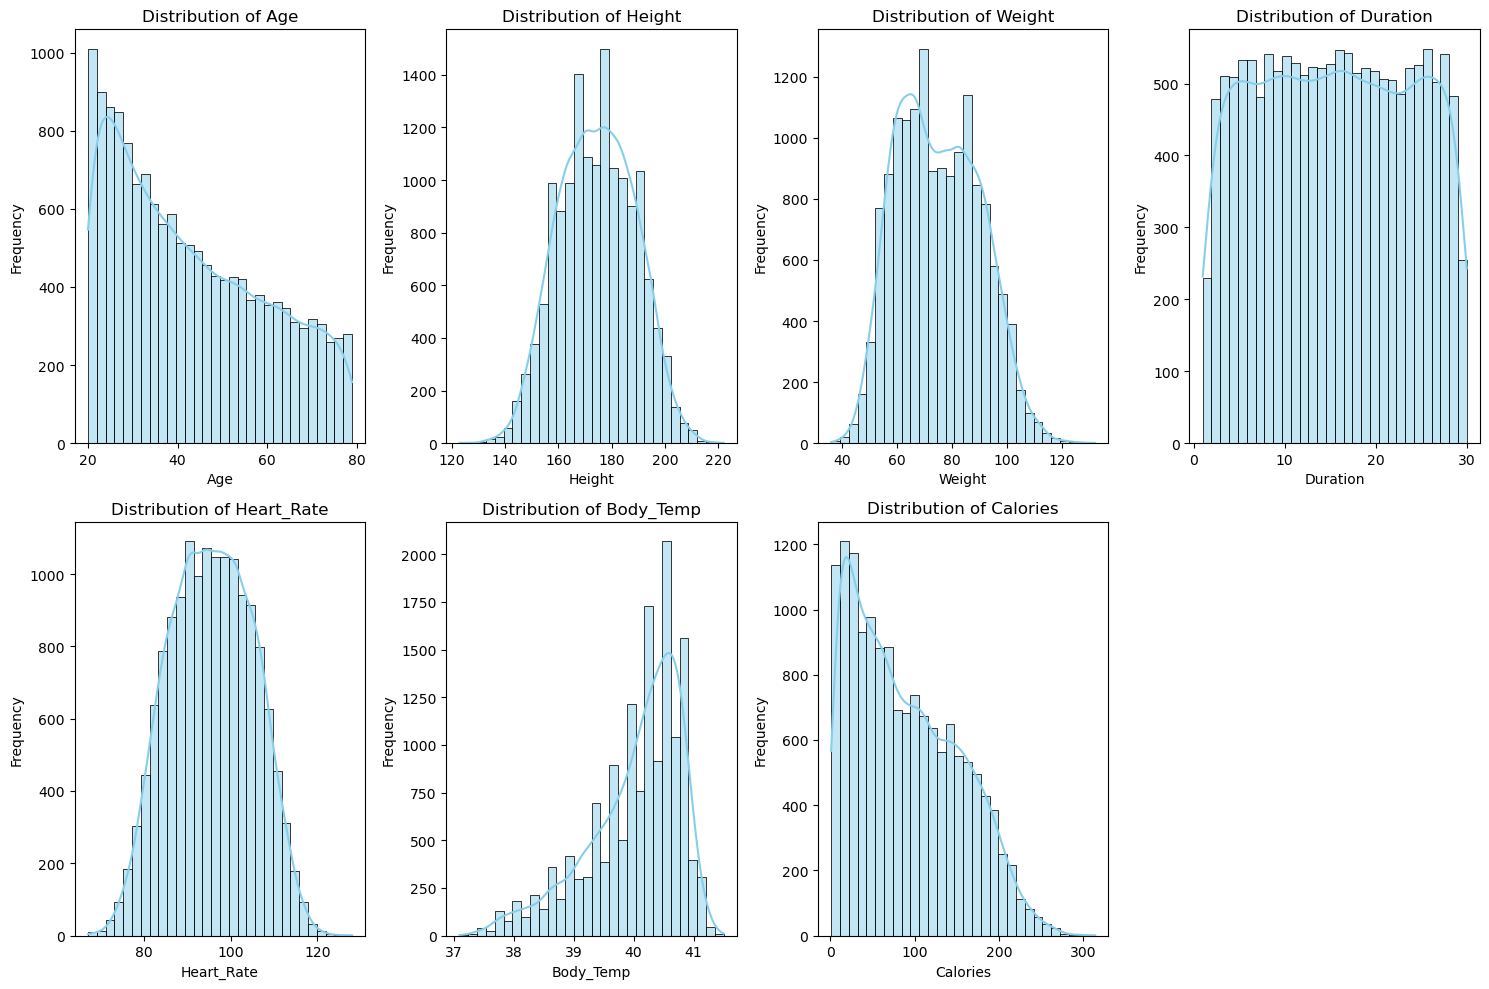

In [19]:
# List of numeric features
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

# Create individual histograms for each numeric feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


####  Data is highly skewed so performing box cox transformation here

In [20]:
# Applying  Box-Cox transformation to the 'Body_Temp' column
transformed_body_temp, lambda_value = stats.boxcox(data['Body_Temp'])

# Updating  the 'Body_Temp' column with the transformed values
data['Body_Temp'] = transformed_body_temp

# Print the lambda value (the power transformation factor)
print("Lambda value (optimal power transformation factor):", lambda_value)


Lambda value (optimal power transformation factor): 23.33997545219827


In [21]:
# Applying  Box-Cox transformation to the 'Calories' column
transformed_body_temp, lambda_value = stats.boxcox(data['Calories'])
# Updating the 'Calories' column with the transformed values
data['Calories'] = transformed_body_temp
print("Lambda value (optimal log transformation factor):", lambda_value)

Lambda value (optimal log transformation factor): 0.4538948554411874


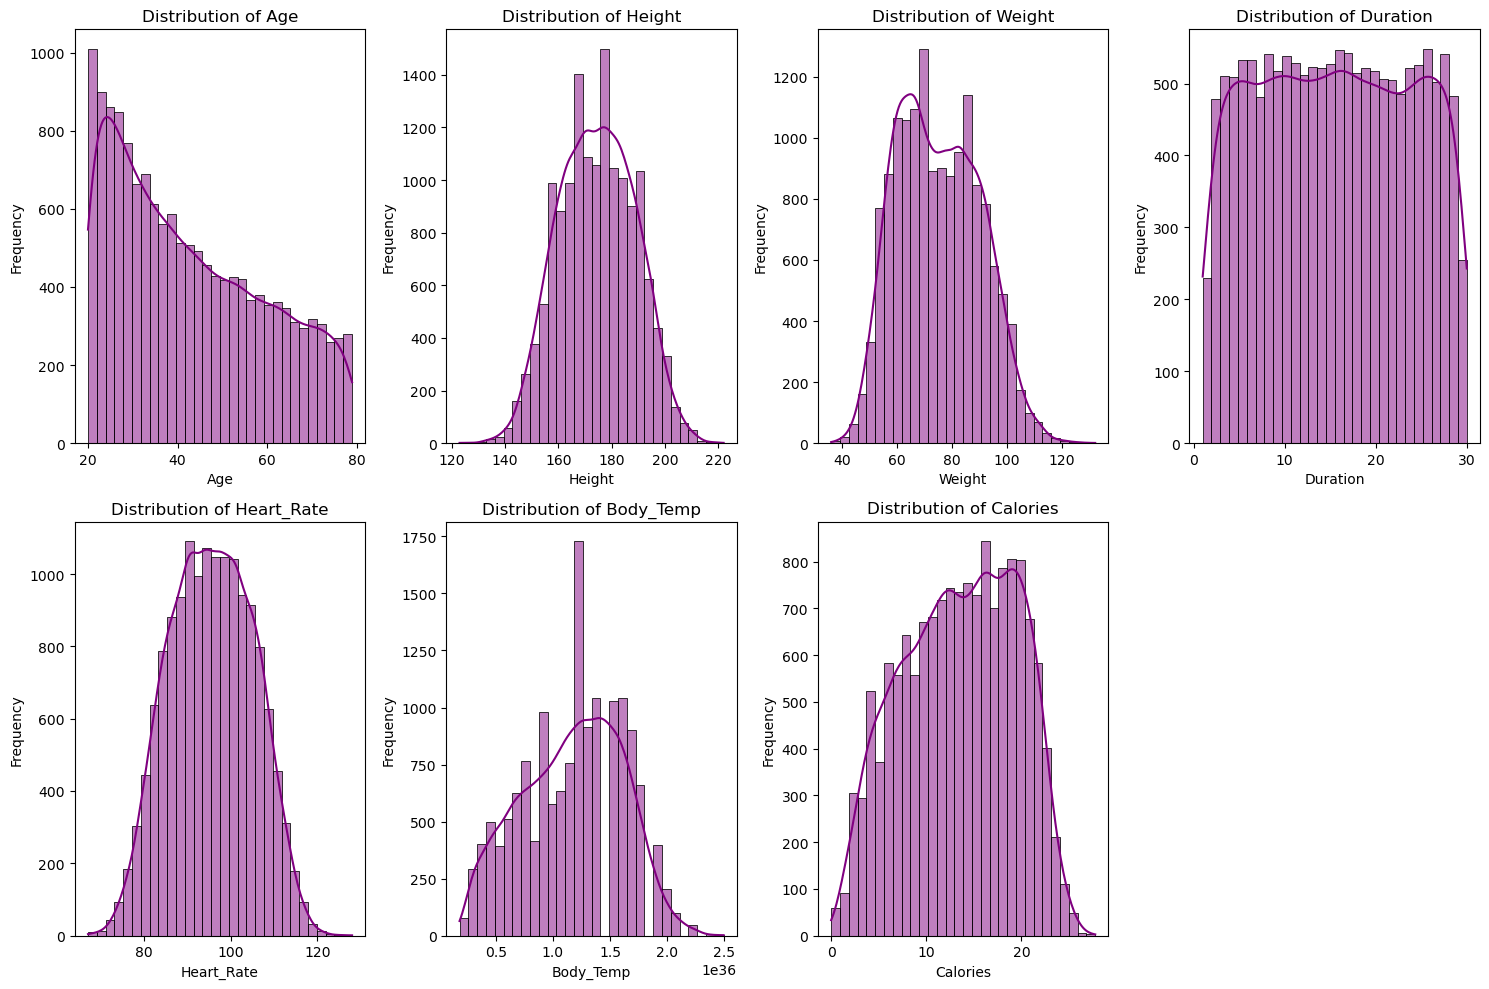

In [22]:
# List of numeric features
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

# Create individual histograms for each numeric feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[feature], kde=True, color='purple', bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

#### Now all the features in the dataset are Normally Distributed:

### CORRELATION ANALYSIS

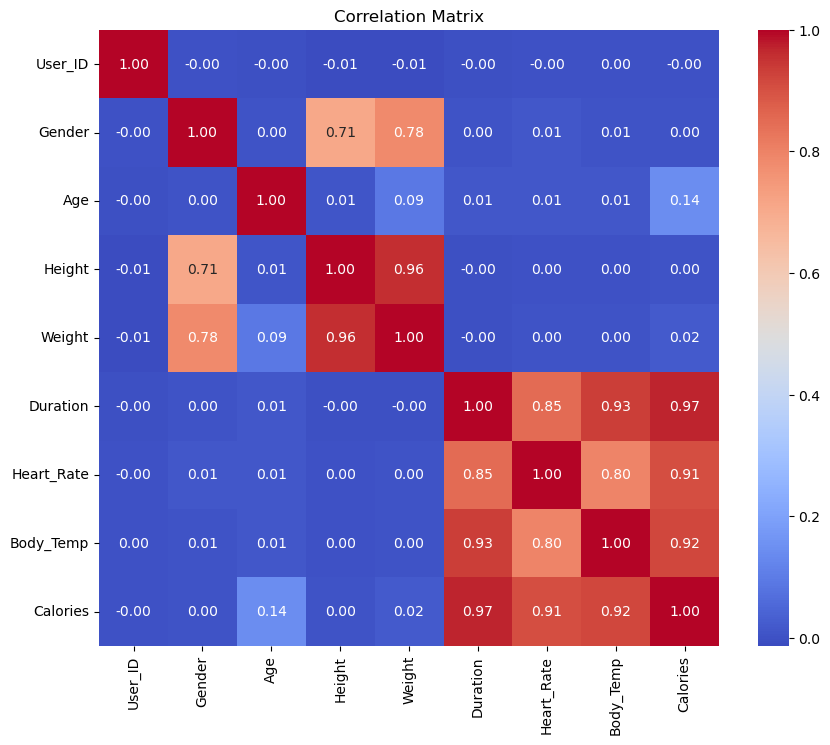

In [23]:
# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# VARIATION INFLATION FACTOR: For dependent variables:

# Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
# Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.
# This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [24]:
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = data.columns
  vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data. shape[1])]

  return(vif)

calculate_vif(data[[i for i in data.describe().columns]])

,variables,VIF
0,User_ID,0.230253
1,Gender,0.894625
2,Age,0.568383
3,Height,0.051398
4,Weight,0.246503
5,Duration,5.726898
6,Heart_Rate,0.125833
7,Body_Temp,66.017838
8,Calories,6.325460


## ANALYZING RELATIONSHIPS

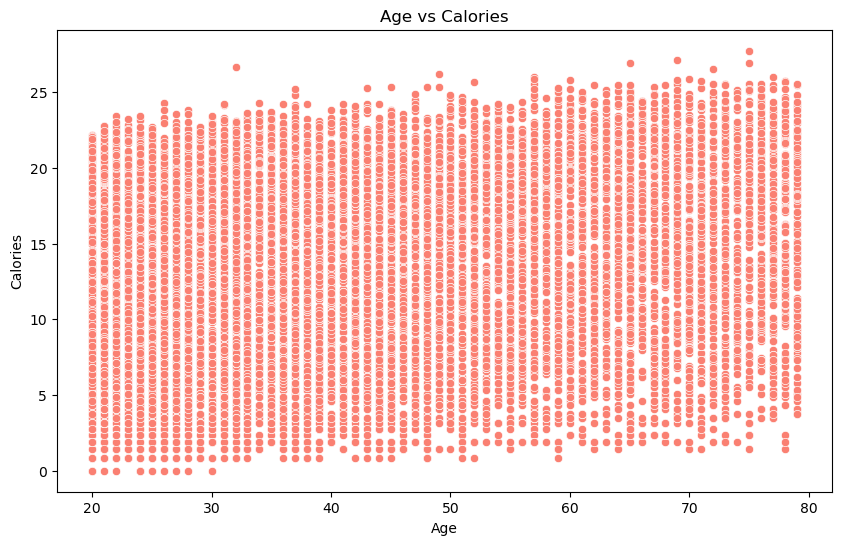

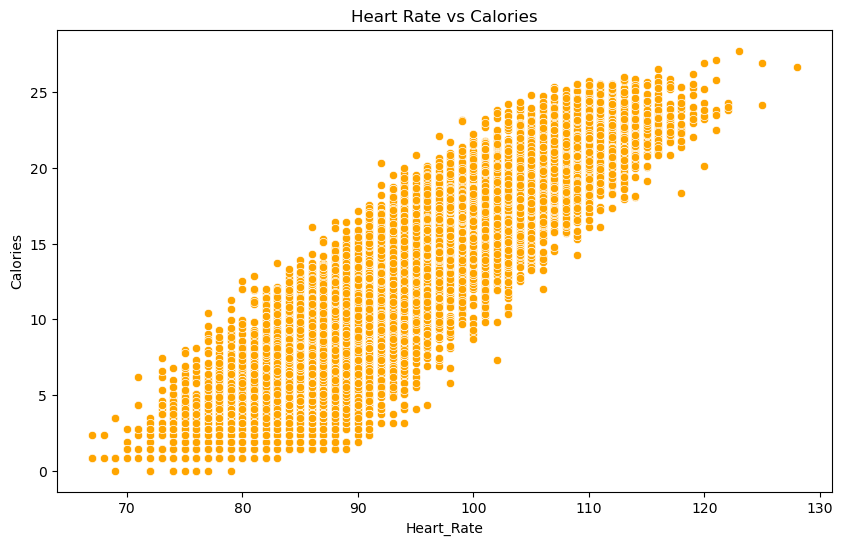

In [25]:
# Relationship between Age and Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Calories', data=data,color='salmon')
plt.title('Age vs Calories')
plt.show()

# Relationship between Heart Rate and Calories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart_Rate', y='Calories', data=data,color='orange')
plt.title('Heart Rate vs Calories')
plt.show()


## OUTLIERS DETECTION

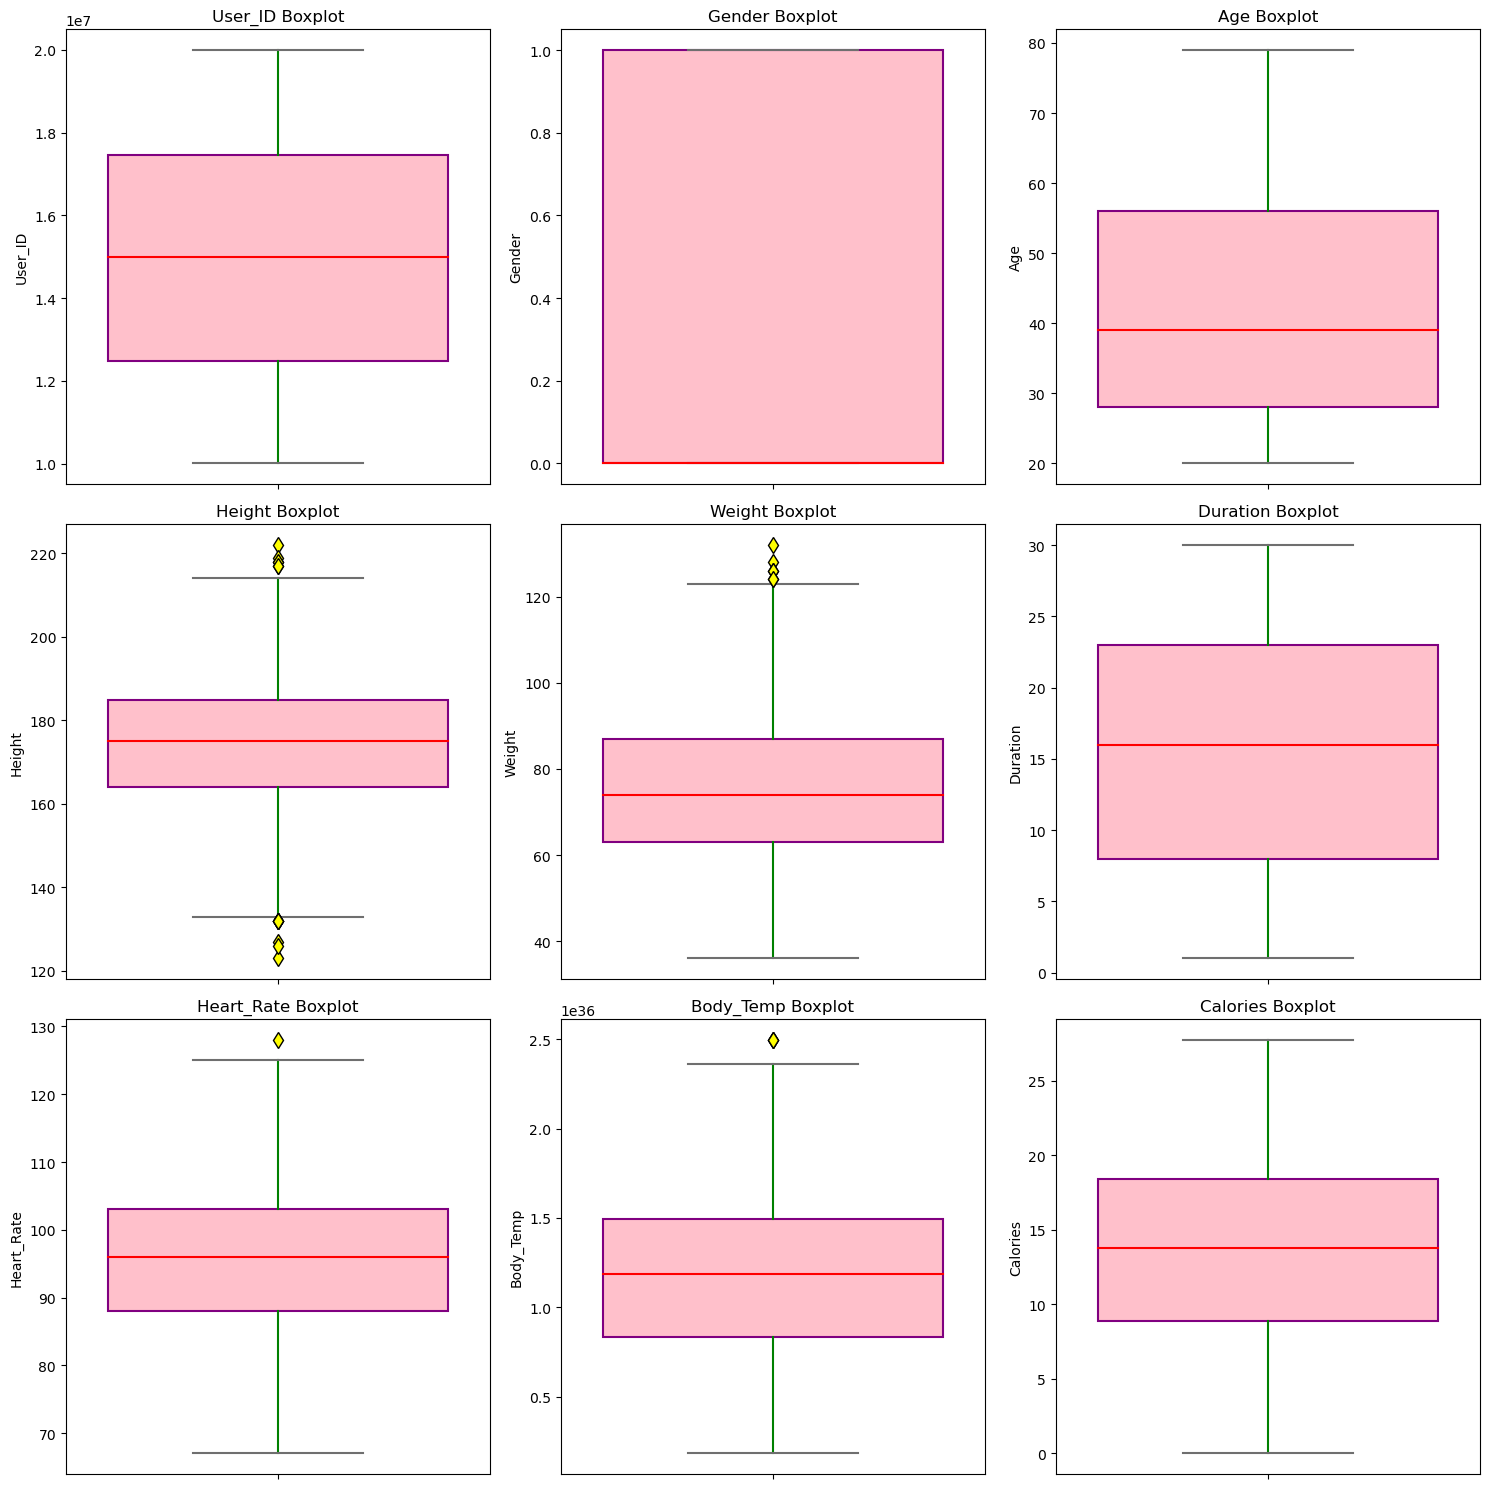

In [26]:
# Get the list of all features in the dataset
features = data.columns

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Generate box plots for all features
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(y=feature, data=data, ax=axes[row, col],color='skyblue', 
            boxprops=dict(facecolor='pink', edgecolor='purple'),  # Box color and border color
            whiskerprops=dict(color='green'),  # Whisker color
            medianprops=dict(color='red'),  # Median line color
            flierprops=dict(markerfacecolor='yellow', markeredgecolor='black', markersize=8)  # Outliers color and style
           )
    axes[row, col].set_title(f'{feature} Boxplot')

# Remove empty subplots if the number of features is not a multiple of num_cols
for i in range(len(features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## Method to deal with an outliers:

In [27]:
features_to_calculate_iqr = ['Height', 'Weight', 'Heart_Rate', 'Body_Temp']

# Calculate and print IQR for specified features
for feature in features_to_calculate_iqr:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    print(f'IQR for {feature}: {iqr}')


IQR for Height: 21.0
IQR for Weight: 24.0
IQR for Heart_Rate: 15.0
IQR for Body_Temp: 6.600155686010066e+35


## Replacing the outliers with the Median of the feature

In [28]:
# Defining lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
    
# Replacing outliers with the median of the feature
data[feature] = data[feature].apply(lambda x: data[feature].median() if x < lower_bound or x > upper_bound else x)

# Now, outliers in specified features have been replaced with the median

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('your_dataset.csv')

# Data Overview
print("Data Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nShape of the dataset:\n", df.shape)
print("\nData Description:\n", df.describe())

# Checking for Null Values
print("\nNull Values:\n", df.isnull().sum())

# Checking for Duplicates
print("\nDuplicates:\n", df.duplicated().sum())

# Handling Missing Values (Example: Filling with mean)
df.fillna(df.mean(), inplace=True)

# Data Distribution (Skewness)
print("\nSkewness:\n", df.skew())

# Applying Box-Cox Transformation to reduce skewness
numeric_features = df.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    if skew(df[feature]) > 0.5:
        df[feature], _ = boxcox(df[feature] + 1) # BoxCox requires positive data

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Variance Inflation Factor (VIF) to check multicollinearity
X = df.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVariance Inflation Factor:\n", vif_data)

# Outlier Detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected:\n", outliers)

# Handling Outliers (Example: Replacing with mean)
for feature in numeric_features:
    mean_value = df[feature].mean()
    df[feature] = np.where(df[feature] > (Q3[feature] + 1.5 * IQR[feature]), mean_value, df[feature])
    df[feature] = np.where(df[feature] < (Q1[feature] - 1.5 * IQR[feature]), mean_value, df[feature])

# Univariate Analysis
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Bivariate Analysis
for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'target':  # Assuming 'target' is the column name for the dependent variable
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[column], y=df['target'])
        plt.title(f'{column} vs Target')
        plt.show()

# Multivariate Analysis
sns.pairplot(df)
plt.show()

# Imbalance of Data
target_counts = df['target'].value_counts()
print("\nTarget Variable Distribution:\n", target_counts)

# Variance and Covariance
print("\nVariance:\n", df.var())
print("\nCovariance:\n", df.cov())

# Feature Importance using SelectKBest
X = df.drop('target', axis=1)
y = df['target']
best_features = SelectKBest(score_func=f_regression, k='all').fit(X, y)
print("\nFeature Scores:\n", best_features.scores_)

# Feature Importance using SelectPercentile
percentile_features = SelectPercentile(score_func=f_regression, percentile=10).fit(X, y)
print("\nPercentile Features Scores:\n", percentile_features.scores_)

# Standardizing the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('target', axis=1))

# New dataframe with scaled features
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled['target'] = y.values
print("\nScaled DataFrame Head:\n", df_scaled.head())

# Save the cleaned and processed data
df_scaled.to_csv('processed_dataset.csv', index=False)
